# Nettoyer et analyser les sondages de départ des employés

Dans ce projet, nous allons nettoyer et analyser les enquêtes de sortie des employés du ministère de [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) et Technical and Further Education (TAFE) du gouvernement du Queensland en Australie. L'enquête de sortie TAFE peut être trouvée [ici](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) et l'enquête pour le DETE peut être trouvée [ici](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

Nous prétendons que nos parties prenantes veulent que nous combinions les résultats des deux enquêtes pour répondre à la question suivante:

   - Les employés qui n'ont travaillé pour les instituts que pendant une courte période démissionnent-ils en raison d'un certain mécontentement? Et les employés qui y sont depuis plus longtemps?


# Introduction

Tout d'abord, nous lirons les ensembles de données et ferons une première exploration.


In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('OneDrive\Documents\my_datasets\Dete_survey.csv')
tafe_survey = pd.read_csv('OneDrive\Documents\my_datasets\Tafe_survey.csv')

In [2]:
pd.options.display.max_columns = 150
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.shape

(822, 56)

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [7]:
tafe_survey.shape

(702, 72)

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

Nous pouvons faire les observations suivantes sur la base des travaux ci-dessus:

   - The dataframe dete_survey contient des valeurs «Not Stated» qui indiquent que des valeurs sont manquantes, mais elles ne sont pas représentées sous la forme NaN.
   - Les deux dete_survey et tafe_survey contiennent de nombreuses colonnes dont nous n'avons pas besoin pour terminer notre analyse.
   - Chaque dataframe contient plusieurs des mêmes colonnes, mais les noms de colonne sont différents.
   - Plusieurs colonnes / réponses indiquent qu'un employé a démissionné parce qu'il n'était pas satisfait.

# Identifier les valeurs manquantes et supprimer les colonnes inutiles

Tout d'abord, nous corrigerons les valeurs 'Not Stated' et supprimerons certaines des colonnes dont nous n'avons pas besoin pour notre analyse.

In [10]:
dete_survey = pd.read_csv('OneDrive\Documents\my_datasets\Dete_survey.csv', na_values='Not Stated')

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Renommer les colonnes

Ensuite, nous standardiserons les noms des colonnes avec lesquelles nous voulons travailler, car nous voulons finalement combiner les dataframes.

In [12]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

In [13]:
name_update = {'Record ID': 'id',
               'CESSATION YEAR': 'cease_date', 
               'Reason for ceasing employment': 'separationtype', 
               'Gender. What is your Gender?': 'gender', 
               'CurrentAge. Current Age': 'age', 
               'Employment Type. Employment Type': 'employment_status', 
               'Classification. Classification': 'position', 
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(name_update, axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separationtype                                       701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

# Filtrer les données

Pour ce projet, nous analyserons uniquement les répondants au sondage qui ont démissionné, nous ne sélectionnerons donc que les types de séparation contenant la chaîne «Resignation».

In [16]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()

# Vérifier les données

Ci-dessous, nous nettoyons et explorons les colonnes cease_date et dete_start_date pour nous assurer que toutes les années ont du sens. Nous utiliserons les critères suivants:

-    Puisque la cease_date est la dernière année d'emploi de la personne et que dete_start_date est la première année d'emploi de la personne, il ne serait pas logique d'avoir des années après la date actuelle.
-    Étant donné que la plupart des personnes dans ce domaine commencent à travailler dans la vingtaine, il est également peu probable que dete_start_date soit antérieure à 1940.

In [19]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [20]:
pattern = r"([1-2][0-2][0-9]{2})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern)

In [21]:
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [22]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [51]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [24]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [52]:
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

Voici nos résultats:

-    Les années dans les deux dataframes ne correspondent pas complètement. Le dataframe tafe_survey_updated contient des dates d'interruption en 2009, mais pas le dataframe dete_survey_updated. Le dataframe tafe_survey_updated contient également beaucoup plus de dates d'interruption en 2010 que le dataframe dete_survey_updated. Puisque nous ne sommes pas concernés par l'analyse des résultats par année, nous les laisserons tels quels.

# Créer une nouvelle colonne

Étant donné que notre objectif final est de répondre à la question ci-dessous, nous avons besoin d'une colonne contenant le temps passé par un employé sur son lieu de travail, ou les années de service, dans les deux cadres de données.

  -  Objectif final: les employés qui n'ont travaillé pour les instituts que pendant une courte période démissionnent-ils en raison d'une sorte d'insatisfaction? Qu'en est-il des employés qui travaillent depuis plus longtemps?

Le dataframe tafe_resignations contient déjà une colonne "service", que nous avons renommée institute_service.

Ci-dessous, nous calculons les années de service dans le dataframe dete_survey_updated en soustrayant dete_start_date de cease_date et créons une nouvelle colonne nommée institute_service.

In [53]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Identifier les employés insatisfaits

Ensuite, nous identifierons tous les employés qui ont démissionné parce qu'ils n'étaient pas satisfaits. Vous trouverez ci-dessous les colonnes que nous utiliserons pour classer les employés comme «insatisfaits» de chaque base de données:

 1.   tafe_survey_updated:
     -  Contributing Factors. Dissatisfaction
     -  Contributing Factors. Job Dissatisfaction
 1.   dafe_survey_updated:    
     -   job_dissatisfaction
     -   dissatisfaction_with_the_department
     -   physical_work_environment
     -   lack_of_recognition
     -   lack_of_job_security
     -   work_location
     -   employment_conditions
     -   work_life_balance
     -   workload


Si l'employé a indiqué que l'un des facteurs ci-dessus a entraîné sa démission, nous le marquerons comme 'dissatisfied'  dans une nouvelle colonne. Après nos modifications, la nouvelle colonne 'dissatisfied' ne contiendra que les valeurs suivantes:

   - True: indique qu'une personne a démissionné parce qu'elle n'était pas satisfaite d'une manière ou d'une autre
   - False: indique qu'une personne a démissionné pour une raison autre que son insatisfaction à l'égard du poste
   - NaN: indique que la valeur est manquante

In [26]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [28]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [29]:
factors = ['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[factors].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [30]:
factors = ['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']
dete_resignations['dissatisfied'] = dete_resignations[factors].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

# Combiner les données

Ci-dessous, nous ajouterons une colonne 'institute' afin de pouvoir différencier les données de chaque enquête après les avoir combinées. Ensuite, nous combinerons les dataframes et supprimerons toutes les colonnes restantes dont nous n'avons pas besoin.


In [31]:
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"

In [32]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True)

In [33]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()

# Nettoyer la colonne de service

Ensuite, nous allons nettoyer la colonne institute_service et classer les employés selon les définitions suivantes:

   - New: moins de 3 ans sur le lieu de travail
   - Experienced: 3-6 ans sur le lieu de travail
   - Established: 7 à 10 ans sur le lieu de travail
   - Veteran: 11 ans ou plus en milieu de travail
   
Notre analyse est basée sur cet article, qui fait valoir que la compréhension des besoins des employés en fonction du stade de carrière plutôt que de l'âge est plus efficace.

In [34]:
combined_updated.notnull().sum().sort_values(ascending=False)

institute            651
separationtype       651
id                   651
dissatisfied         643
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
dtype: int64

In [35]:
combined_updated['institute_service']

0        7
1       18
2        3
3       15
4        3
      ... 
646    5-6
647    1-2
648    NaN
649    5-6
650    3-4
Name: institute_service, Length: 651, dtype: object

In [36]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

In [37]:
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [38]:
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [39]:
def experience_serv(val):
    if pd.isnull(val):
        return np.nan
    elif val >= 11:
        return 'Veteran'
    elif 3 <= val < 7:
        return 'Experienced'
    elif 7 <= val < 11:
        return 'Established'
    else:
        return 'New'

In [40]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(experience_serv)

In [41]:
combined_updated['service_cat']

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
646    Experienced
647            New
648            NaN
649    Experienced
650    Experienced
Name: service_cat, Length: 651, dtype: object

In [42]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

# Effectuer une analyse initiale

Enfin, nous remplacerons les valeurs manquantes dans la colonne dissatisfied par la valeur la plus fréquente, False. Ensuite, nous calculerons le pourcentage d'employés qui ont démissionné en raison d'un mécontentement dans chaque groupe service_cat et tracerons les résultats.

Notez que puisque nous avons encore des valeurs manquantes supplémentaires à traiter, ceci est censé être une introduction initiale à l'analyse, pas à l'analyse finale.

In [43]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [44]:
combined_updated['dissatisfied'].fillna(value=False, inplace=True)

In [45]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [46]:
pv_combined_update = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')

In [47]:
pv_combined_update

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


<AxesSubplot:xlabel='service_cat'>

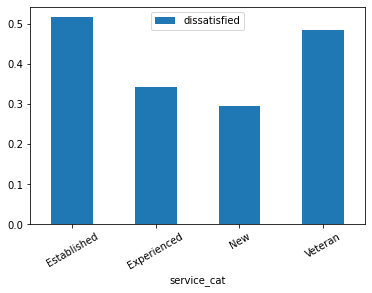

In [48]:
%matplotlib inline
pv_combined_update.plot(kind='bar', rot=30)

À partir de l'analyse initiale ci-dessus, nous pouvons provisoirement conclure que les employés comptant 7 ans ou plus de service sont plus susceptibles de démissionner en raison d'un certain type d'insatisfaction à l'égard de l'emploi que les employés comptant moins de 7 ans de service. Cependant, nous devons gérer le reste des données manquantes pour finaliser notre analyse.